In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

%matplotlib inline

In [2]:
df = pd.read_csv('years_new.csv')

In [3]:
df.head()

,date,lat,long,ID
0,2019-06,42.957503,-87.938367,1
1,2016-10,42.899259,-88.047098,10
2,2011-08,42.921614,-87.881025,100
3,2018-09,43.050123,-88.040263,1000
4,2019-05,42.959289,-88.026043,10000


In [4]:
df['mth'] = [x[5:] for x in df['date']]

In [5]:
df.head()

,date,lat,long,ID,mth
0,2019-06,42.957503,-87.938367,1,06
1,2016-10,42.899259,-88.047098,10,10
2,2011-08,42.921614,-87.881025,100,08
3,2018-09,43.050123,-88.040263,1000,09
4,2019-05,42.959289,-88.026043,10000,05


## Plot histogram of Months when images were taken

In [9]:
df = df.sort_values(by='mth')

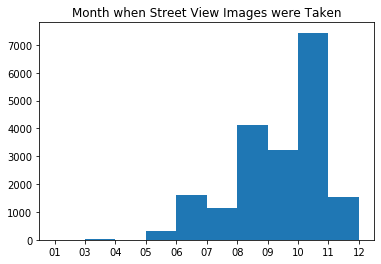

In [12]:
plt.hist(df['mth'])
plt.title('Month when Street View Images were Taken')
plt.savefig('StreetView_Hist_Month.jpg')

## Plot months when images were taken on a map
Goal: see if certain neighborhoods are likely to have leaves in them

In [14]:
geometry = [Point(xy) for xy in zip(df["long"], df["lat"])]

In [15]:
geo_df = gpd.GeoDataFrame(df, crs = {'init': 'epsg:4326'}, geometry=geometry)
geo_df.head()

,date,lat,long,ID,mth,geometry
14928,2016-01,43.014928,-88.014125,10638,01,POINT (-88.01412538 43.01492808)
13943,2016-01,43.012983,-88.009604,9639,01,POINT (-88.00960427 43.01298312)
13945,2016-01,43.014967,-88.009577,9640,01,POINT (-88.00957679999999 43.0149667)
5296,2016-01,42.891054,-88.039377,19338,01,POINT (-88.03937715000001 42.89105422)
14927,2016-01,43.012954,-88.014187,10637,01,POINT (-88.01418699999999 43.012954)


In [16]:
street_map = gpd.read_file('MKE_Roads/tl_2015_55079_roads.shp')

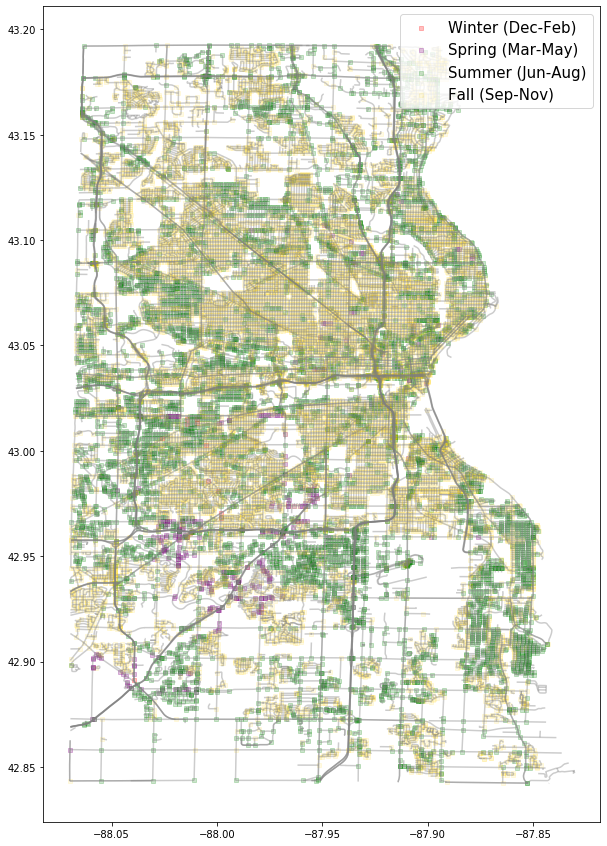

In [25]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df[(geo_df['mth'].isin(['12','01','02']))].plot(ax=ax, markersize=10, color='red', alpha=0.25, marker="s", label = 'Winter (Dec-Feb)')
geo_df[(geo_df['mth'].isin(['03','04','05']))].plot(ax=ax, markersize=10, color='purple', alpha=0.25, marker="s", label = 'Spring (Mar-May)')
geo_df[(geo_df['mth'].isin(['06','07','08']))].plot(ax=ax, markersize=10, color='green', alpha=0.2, marker="s", label = 'Summer (Jun-Aug)')
geo_df[(geo_df['mth'].isin(['09','10','11']))].plot(ax=ax, markersize=10, color='gold', alpha=0.1, marker="s", label = 'Fall (Sep-Nov)')
plt.legend(prop={'size':15}, loc=1)
plt.savefig('Seasonality_of_Photos.png')